In [2]:
import numpy as np
from matplotlib import pyplot as plt
import os
import tifffile as tiff
import cv2
from sklearn.metrics import jaccard_score, f1_score

In [5]:
# Directories
human_inl = r"E:\SEGMENTATIONMASKCOMP\HINL/"
sliced_train = r"E:\SEGMENTATIONMASKCOMP\slice_trained/"
untrained = r"E:\SEGMENTATIONMASKCOMP\untrained/"
gt = r"E:\SEGMENTATIONMASKCOMP\GT/"

In [8]:
# Function to read image as binary mask
def read_mask(file_path):
    mask = tiff.imread(file_path)
    # Convert to binary mask if necessary (assuming foreground is non-zero)
    mask = (mask > 0).astype(np.uint8)
    return mask

# Function to compute metrics
def compute_metrics(pred_mask, gt_mask):
    pred_flat = pred_mask.flatten()
    gt_flat = gt_mask.flatten()

    iou = jaccard_score(gt_flat, pred_flat, average='binary', zero_division=0)
    dice = f1_score(gt_flat, pred_flat, average='binary', zero_division=0)
    return iou, dice

# List of files in the directories
hinl_files = set(f for f in os.listdir(human_inl) if f.endswith('.tiff'))
sliced_files = set(f for f in os.listdir(sliced_train) if f.endswith('.tiff'))
untrained_files = set(f for f in os.listdir(untrained) if f.endswith('.tiff'))
gt_files = set(f for f in os.listdir(gt) if f.endswith('.tiff'))

# Find common files across all directories
common_files = hinl_files & sliced_files & untrained_files & gt_files

# Initialize metrics storage
iou_scores_hinl = []
dice_scores_hinl = []
iou_scores_sliced = []
dice_scores_sliced = []
iou_scores_untrained = []
dice_scores_untrained = []

# Compute metrics for each common file
for filename in common_files:
    hinl_mask = read_mask(os.path.join(human_inl, filename))
    sliced_mask = read_mask(os.path.join(sliced_train, filename))
    untrained_mask = read_mask(os.path.join(untrained, filename))
    gt_mask = read_mask(os.path.join(gt, filename))

    # Compute metrics for human_inl vs GT
    iou_hinl, dice_hinl = compute_metrics(hinl_mask, gt_mask)
    iou_scores_hinl.append(iou_hinl)
    dice_scores_hinl.append(dice_hinl)

    # Compute metrics for sliced_train vs GT
    iou_sliced, dice_sliced = compute_metrics(sliced_mask, gt_mask)
    iou_scores_sliced.append(iou_sliced)
    dice_scores_sliced.append(dice_sliced)

    # Compute metrics for untrained vs GT
    iou_untrained, dice_untrained = compute_metrics(untrained_mask, gt_mask)
    iou_scores_untrained.append(iou_untrained)
    dice_scores_untrained.append(dice_untrained)

# Average metrics
mean_iou_hinl = np.mean(iou_scores_hinl)
mean_dice_hinl = np.mean(dice_scores_hinl)
mean_iou_sliced = np.mean(iou_scores_sliced)
mean_dice_sliced = np.mean(dice_scores_sliced)
mean_iou_untrained = np.mean(iou_scores_untrained)
mean_dice_untrained = np.mean(dice_scores_untrained)

print(f"Mean IoU for Human-In-Loop: {mean_iou_hinl:.4f}")
print(f"Mean Dice for Human-In-Loop: {mean_dice_hinl:.4f}")
print(f"Mean IoU for Sliced-Trained: {mean_iou_sliced:.4f}")
print(f"Mean Dice for Sliced-Trained: {mean_dice_sliced:.4f}")
print(f"Mean IoU for Untrained: {mean_iou_untrained:.4f}")
print(f"Mean Dice for Untrained: {mean_dice_untrained:.4f}")

Mean IoU for Human-In-Loop: 0.3906
Mean Dice for Human-In-Loop: 0.5452
Mean IoU for Sliced-Trained: 0.2395
Mean Dice for Sliced-Trained: 0.3694
Mean IoU for Untrained: 0.2922
Mean Dice for Untrained: 0.4402


C:\Users\miles\AppData\Local\Temp\ipykernel_2460\2999179440.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([iou_scores_hinl, iou_scores_sliced, iou_scores_untrained],
C:\Users\miles\AppData\Local\Temp\ipykernel_2460\2999179440.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([dice_scores_hinl, dice_scores_sliced, dice_scores_untrained],


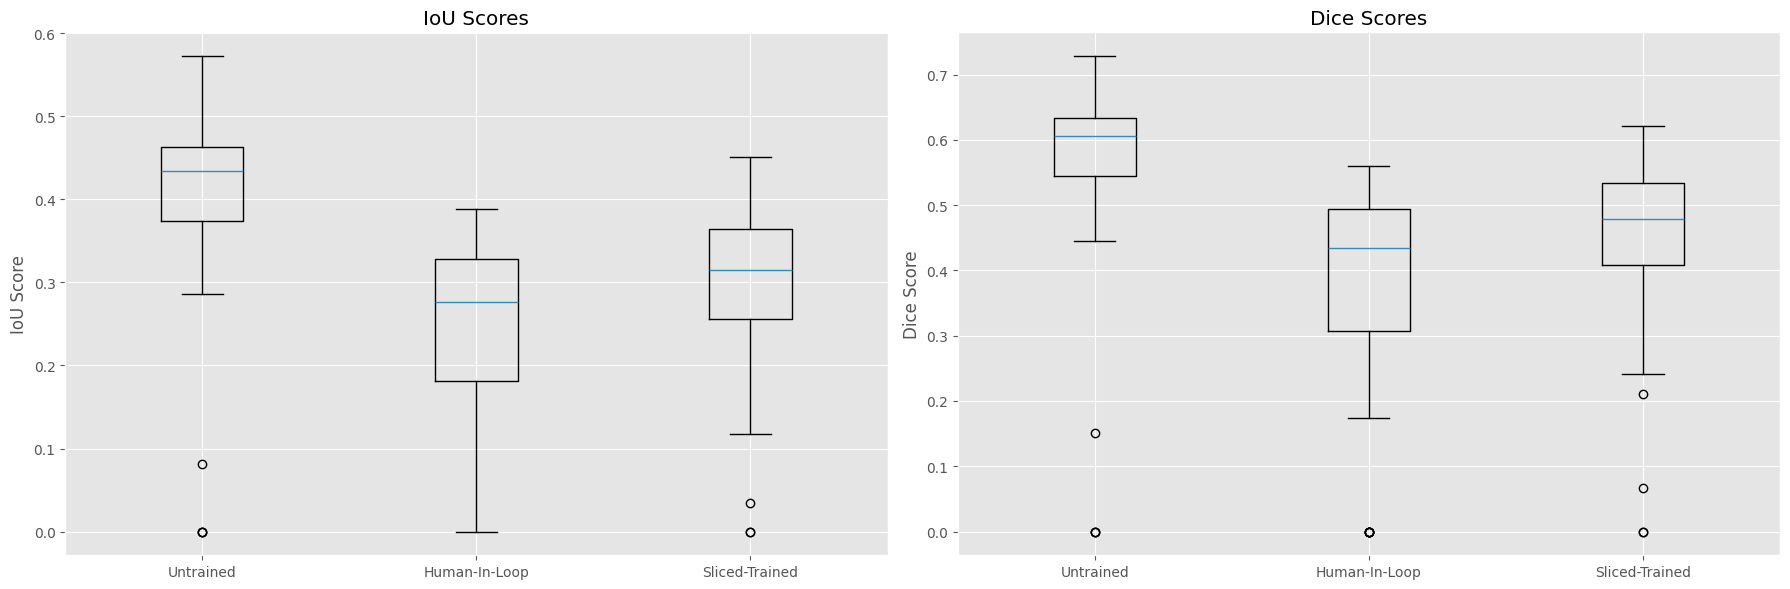

In [9]:
plt.style.use('ggplot')
# Plotting boxplots for IoU and Dice scores
plt.figure(figsize=(18, 6))

# Boxplot for IoU scores
plt.subplot(1, 2, 1)
plt.boxplot([iou_scores_hinl, iou_scores_sliced, iou_scores_untrained], 
            labels=['Untrained', 'Human-In-Loop', 'Sliced-Trained'])
plt.title('IoU Scores')
plt.ylabel('IoU Score')

# Boxplot for Dice scores
plt.subplot(1, 2, 2)
plt.boxplot([dice_scores_hinl, dice_scores_sliced, dice_scores_untrained], 
            labels=['Untrained', 'Human-In-Loop', 'Sliced-Trained'])
plt.title('Dice Scores')
plt.ylabel('Dice Score')

plt.tight_layout()
plt.show()

In [10]:
import pandas as pd
# Save scores to CSV
scores_df = pd.DataFrame({
    "Method": ["Human-In-Loop"] * len(common_files) + ["Sliced-Trained"] * len(common_files) + ["Untrained"] * len(common_files),
    "IoU": iou_scores_hinl + iou_scores_sliced + iou_scores_untrained,
    "Dice": dice_scores_hinl + dice_scores_sliced + dice_scores_untrained
})

# Save scores to CSV
csv_filename = "segmentation_scores.csv"
scores_df.to_csv(csv_filename, index=False)